In [3]:
import csv
import json
import os
import sys
import matplotlib.pyplot as plt
import networkx as nx



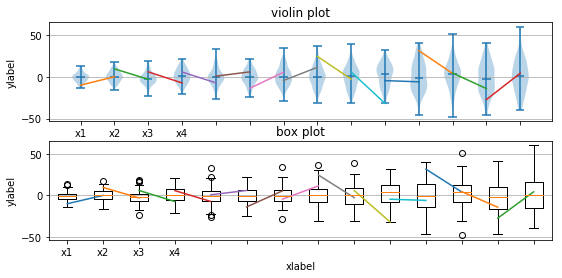

In [26]:
"""
===================================
Box plot vs. violin plot comparison
===================================

Note that although violin plots are closely related to Tukey's (1977)
box plots, they add useful information such as the distribution of the
sample data (density trace).

By default, box plots show data points outside 1.5 * the inter-quartile
range as outliers above or below the whiskers whereas violin plots show
the whole range of the data.

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf

Violin plots require matplotlib >= 1.4.

For more information on violin plots, the scikit-learn docs have a great
section: http://scikit-learn.org/stable/modules/density.html
"""

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 4))

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 20)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')
    for i in range(len(all_data)-1):
        ax.plot([i+1, i+2], [all_data[i][-1], all_data[i+1][0]])

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()


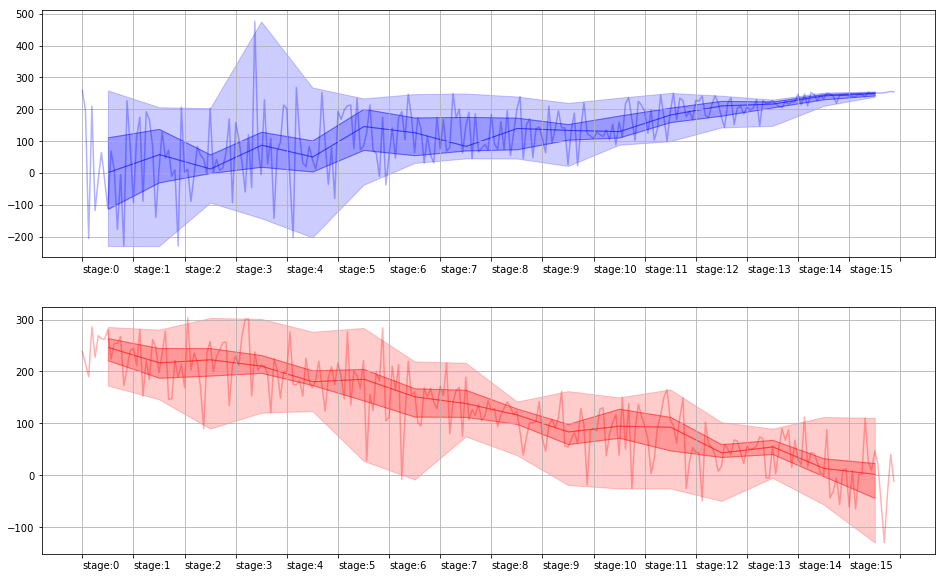

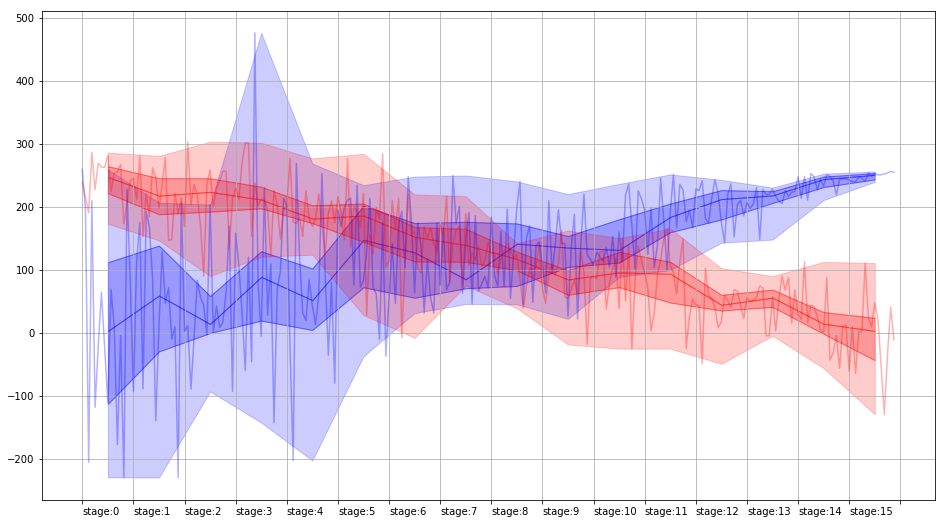

In [127]:
"""
===================================
Box plot vs. violin plot comparison
===================================

Note that although violin plots are closely related to Tukey's (1977)
box plots, they add useful information such as the distribution of the
sample data (density trace).

By default, box plots show data points outside 1.5 * the inter-quartile
range as outliers above or below the whiskers whereas violin plots show
the whole range of the data.

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf

Violin plots require matplotlib >= 1.4.

For more information on violin plots, the scikit-learn docs have a great
section: http://scikit-learn.org/stable/modules/density.html
"""

import matplotlib.pyplot as plt
import numpy as np
from math import ceil,sin
%matplotlib inline
def the_time_plot(ax, all_data, color):

    group_data = [all_data[i*group_num:min((i+1)*group_num, len(all_data))] for i in range(int(ceil(len(all_data)*1.0/group_num)))]
    #all_data = [np.random.normal(std*5, std, 100) for std in range(6, 20)]

    # plot violin plot
    # plot box plot
    N = len(all_data)
    M = len(group_data)
    ax.plot(list(range(N)), all_data, alpha=0.3,color=color)
    ax.set_xticks([y+1 for y in range(N)])

    g_x = [(i+0.5)*group_num for i in range(M)]
    g_max = [np.max(group_data[i]) for i in range(M)]
    g_avg = [np.average(group_data[i]) for i in range(M)]
    g_med = [np.median(group_data[i]) for i in range(M)]
    g_std = [np.std(group_data[i]) for i in range(M)]
    g_min = [np.min(group_data[i]) for i in range(M)]
    g_p25 = [np.percentile(group_data[i], 25) for i in range(M)]
    g_p75 = [np.percentile(group_data[i], 75) for i in range(M)]
    g_std_u = [g_avg[i] + g_std[i] for i in range(M)]
    g_std_d = [g_avg[i] - g_std[i] for i in range(M)]
    g_orgs = [g_min, g_p25, g_med, g_p75, g_max]
    g_alpha = [0.2, 0.4, 0.4,0.2]
    g_color = [color] * 4
    for i in range(len(g_orgs)-1):
        ax.fill_between(g_x, g_orgs[i], g_orgs[i+1], alpha=g_alpha[i], color=g_color[i])
    ax.set_xticklabels(["stage:%i"%i for i in range(M)], horizontalalignment='left')
    ax.set_xticks([i*group_num for i in range(M+1)])

    # adding horizontal grid lines

def draw_concate(all_datas, group_num, colors):
    Ln = len(all_datas)
    fig, axs = plt.subplots(nrows=Ln, ncols=1,figsize=(16, 5*Ln))
    for i in range(Ln):
        the_time_plot(axs[i], all_datas[i], colors[i])
        axs[i].yaxis.grid(True)
        axs[i].xaxis.grid(True)
    plt.show()

def draw_lay(all_datas, group_num, colors):
    Ln = len(all_datas)
    fig, axs = plt.subplots(figsize=(16, 9))
    for i in range(Ln):
        the_time_plot(axs, all_datas[i], colors[i])
        axs.yaxis.grid(True)
        axs.xaxis.grid(True)
    plt.show()
    

all_data = [[np.random.normal(i,(256-i)*0.5,1)[0] for i in range(1, 256)],
            [np.random.normal(256 - i,20*(sin(i)+2),1)[0] for i in range(1, 256)]]
group_num = 16
draw_concate(all_data, group_num, ['blue', 'red'])
draw_lay(all_data, group_num, ['blue', 'red'])

In [128]:
help(ax.set_xticklabels)

Help on method set_xticklabels in module matplotlib.axes._base:

set_xticklabels(self, labels, fontdict=None, minor=False, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Set the xtick labels with list of strings *labels*
    
    Return a list of axis text instances.
    
    *kwargs* set the :class:`~matplotlib.text.Text` properties.
    Valid properties are
      agg_filter: unknown
      alpha: float (0.0 transparent through 1.0 opaque) 
      animated: [True | False] 
      axes: an :class:`~matplotlib.axes.Axes` instance 
      backgroundcolor: any matplotlib color 
      bbox: FancyBboxPatch prop dict 
      clip_box: a :class:`matplotlib.transforms.Bbox` instance 
      clip_on: [True | False] 
      clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
      color: any matplotlib color 
      contains: a callable function 
      family or fontfamily or fontname or name: [FO

In [69]:
import matplotlib.axes
help(ax.fill_between)

Help on method fill_between in module matplotlib.axes._axes:

fill_between(ax, *args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Make filled polygons between two curves.
    
    
    Create a :class:`~matplotlib.collections.PolyCollection`
    filling the regions between *y1* and *y2* where
    ``where==True``
    
    Parameters
    ----------
    x : array
        An N-length array of the x data
    
    y1 : array
        An N-length array (or scalar) of the y data
    
    y2 : array
        An N-length array (or scalar) of the y data
    
    where : array, optional
        If `None`, default to fill between everywhere.  If not `None`,
        it is an N-length numpy boolean array and the fill will
        only happen over the regions where ``where==True``.
    
    interpolate : bool, optional
        If `True`, interpolate between the two lines to find the
        precise point of intersection.  Otherwise, the start and
        end points of the fill